In [ ]:
# Read -
# https://neptune.ai/blog/select-model-for-time-series-prediction-task#:~:text=The%20first%20specificity%20of%20time,are%20specific%20to%20time%20series.
# https://www.section.io/engineering-education/multivariate-time-series-using-auto-arima/

In [30]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import warnings
import itertools
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pmdarima as pm
from pmdarima.model_selection import train_test_split
from   datetime import  datetime, timedelta

import statsmodels.api as sm

plt.rcParams['figure.figsize']=[16,8]
warnings.filterwarnings('ignore')

In [75]:
# pip install pmdarima


In [2]:
%matplotlib inline
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

plt.rcParams['figure.figsize']=[16,8]

In [3]:
df = pd.read_csv('MainData.csv')
df = df.drop(['TIME M ID', 'TIME Y ID'], axis=1)
df['TIME ID'] =  pd.to_datetime(df["TIME ID"])
df.sort_values(by='TIME ID', ascending = True, inplace=True)
df = df.set_index('TIME ID')
df.head(5)

,ITEM ID,STATE ID,PARTY ID,FABRIC KGS,FABRIC MTRS,SOLD KGS,SOLD MTRS,RATE,AMOUNT
TIME ID,,,,,,,,,
2019-04-01,"60MESHHQ48""WHITE",GJ,"ENTERPRISE TRADING CO.,",NaN,NaN,70.32,630.0,96.0,30510.0
2019-04-01,"LOTUS54""MARINABLUE",WB,"SHEW PRATAP NATHMULL Co.,",531.4,10300.0,207.73,4000.0,24.0,48000.0
2019-04-01,"20MESHMQ84""ORANGE",TN,ANNAI AGENCY,NaN,NaN,9.00,60.0,45.0,2700.0
2019-04-01,"40MESHLQ42""WHITE",GJ,BARDOLIWAL TRADERS,722.9,10980.0,641.50,9600.0,201.0,187500.0
2019-04-01,"20MESHMQ42""BLACK",OD,PATRA ENTERPRISES,NaN,NaN,527.40,6000.0,32.0,96000.0


In [4]:
df.columns

Index(['ITEM ID', 'STATE ID', 'PARTY ID', 'FABRIC KGS', 'FABRIC MTRS',
       'SOLD KGS', 'SOLD MTRS', 'RATE', 'AMOUNT'],
      dtype='object')

In [5]:
##https://www.section.io/engineering-education/missing-values-in-time-series/

In [6]:
#Missing values
print(df.isnull().sum())

# Treat empty values with UNKNOWN String
df['PARTY ID'] = df['PARTY ID'].replace(to_replace=np.nan, value='UNKNOWN PARTY')
df['STATE ID'] = df['STATE ID'].replace(to_replace=np.nan, value='UNKNOWN STATE')
df.isnull().sum()
print("\nAfter")
print(df.isnull().sum())
df.head()

ITEM ID           0
STATE ID        765
PARTY ID        765
FABRIC KGS     2620
FABRIC MTRS    2620
SOLD KGS        765
SOLD MTRS       765
RATE            765
AMOUNT          765
dtype: int64

After
ITEM ID           0
STATE ID          0
PARTY ID          0
FABRIC KGS     2620
FABRIC MTRS    2620
SOLD KGS        765
SOLD MTRS       765
RATE            765
AMOUNT          765
dtype: int64


,ITEM ID,STATE ID,PARTY ID,FABRIC KGS,FABRIC MTRS,SOLD KGS,SOLD MTRS,RATE,AMOUNT
TIME ID,,,,,,,,,
2019-04-01,"60MESHHQ48""WHITE",GJ,"ENTERPRISE TRADING CO.,",NaN,NaN,70.32,630.0,96.0,30510.0
2019-04-01,"LOTUS54""MARINABLUE",WB,"SHEW PRATAP NATHMULL Co.,",531.4,10300.0,207.73,4000.0,24.0,48000.0
2019-04-01,"20MESHMQ84""ORANGE",TN,ANNAI AGENCY,NaN,NaN,9.00,60.0,45.0,2700.0
2019-04-01,"40MESHLQ42""WHITE",GJ,BARDOLIWAL TRADERS,722.9,10980.0,641.50,9600.0,201.0,187500.0
2019-04-01,"20MESHMQ42""BLACK",OD,PATRA ENTERPRISES,NaN,NaN,527.40,6000.0,32.0,96000.0


In [7]:
df['FABRIC KGS'].interpolate(method='linear', inplace=True)
df['FABRIC MTRS'].interpolate(method='linear', inplace=True)
df['SOLD KGS'].interpolate(method='linear', inplace=True)
df['SOLD MTRS'].interpolate(method='linear', inplace=True)
df['RATE'].interpolate(method='linear', inplace=True)
df['AMOUNT'].interpolate(method='linear', inplace=True)
print(df.isnull().sum())

ITEM ID        0
STATE ID       0
PARTY ID       0
FABRIC KGS     1
FABRIC MTRS    1
SOLD KGS       0
SOLD MTRS      0
RATE           0
AMOUNT         0
dtype: int64


In [8]:
#https://stackoverflow.com/questions/35628291/how-can-you-interpolate-nan-values-if-first-few-rows-have-nan-values
df['FABRIC KGS'].interpolate(method='bfill', inplace=True)
df['FABRIC MTRS'].interpolate(method='bfill', inplace=True)
print(df.isnull().sum())
df.head()

ITEM ID        0
STATE ID       0
PARTY ID       0
FABRIC KGS     0
FABRIC MTRS    0
SOLD KGS       0
SOLD MTRS      0
RATE           0
AMOUNT         0
dtype: int64


,ITEM ID,STATE ID,PARTY ID,FABRIC KGS,FABRIC MTRS,SOLD KGS,SOLD MTRS,RATE,AMOUNT
TIME ID,,,,,,,,,
2019-04-01,"60MESHHQ48""WHITE",GJ,"ENTERPRISE TRADING CO.,",531.40,10300.0,70.32,630.0,96.0,30510.0
2019-04-01,"LOTUS54""MARINABLUE",WB,"SHEW PRATAP NATHMULL Co.,",531.40,10300.0,207.73,4000.0,24.0,48000.0
2019-04-01,"20MESHMQ84""ORANGE",TN,ANNAI AGENCY,627.15,10640.0,9.00,60.0,45.0,2700.0
2019-04-01,"40MESHLQ42""WHITE",GJ,BARDOLIWAL TRADERS,722.90,10980.0,641.50,9600.0,201.0,187500.0
2019-04-01,"20MESHMQ42""BLACK",OD,PATRA ENTERPRISES,364.05,5540.0,527.40,6000.0,32.0,96000.0


In [9]:
multi_df = df[['FABRIC KGS', 'FABRIC MTRS','SOLD KGS','SOLD MTRS','RATE','AMOUNT']]
multi_df.reset_index()
multi_df.head()

,FABRIC KGS,FABRIC MTRS,SOLD KGS,SOLD MTRS,RATE,AMOUNT
TIME ID,,,,,,
2019-04-01,531.40,10300.0,70.32,630.0,96.0,30510.0
2019-04-01,531.40,10300.0,207.73,4000.0,24.0,48000.0
2019-04-01,627.15,10640.0,9.00,60.0,45.0,2700.0
2019-04-01,722.90,10980.0,641.50,9600.0,201.0,187500.0
2019-04-01,364.05,5540.0,527.40,6000.0,32.0,96000.0


In [10]:
print(multi_df)

            FABRIC KGS   FABRIC MTRS  SOLD KGS  SOLD MTRS     RATE     AMOUNT
TIME ID                                                                      
2019-04-01      531.40  10300.000000     70.32      630.0    96.00    30510.0
2019-04-01      531.40  10300.000000    207.73     4000.0    24.00    48000.0
2019-04-01      627.15  10640.000000      9.00       60.0    45.00     2700.0
2019-04-01      722.90  10980.000000    641.50     9600.0   201.00   187500.0
2019-04-01      364.05   5540.000000    527.40     6000.0    32.00    96000.0
...                ...           ...       ...        ...      ...        ...
2023-03-01       44.80    450.000000   1038.51    10200.0   962.00   262200.0
2023-03-01     1380.20  13653.333333    349.60     2700.0   982.11    88389.9
2023-03-01     2715.60  26856.666667  12000.00    12000.0   332.50  1317500.0
2023-03-01     4051.00  40060.000000   8627.35    83400.0  2386.72  2048971.2
2023-03-01        5.20    100.000000   8627.35    83400.0  2386.

In [11]:
#The resample() method will aggregate all the data points in the time series and change them to monthly intervals.
resample_multi_df = multi_df.resample('M').mean()

array([<AxesSubplot:xlabel='TIME ID'>, <AxesSubplot:xlabel='TIME ID'>,
       <AxesSubplot:xlabel='TIME ID'>, <AxesSubplot:xlabel='TIME ID'>,
       <AxesSubplot:xlabel='TIME ID'>, <AxesSubplot:xlabel='TIME ID'>],
      dtype=object)

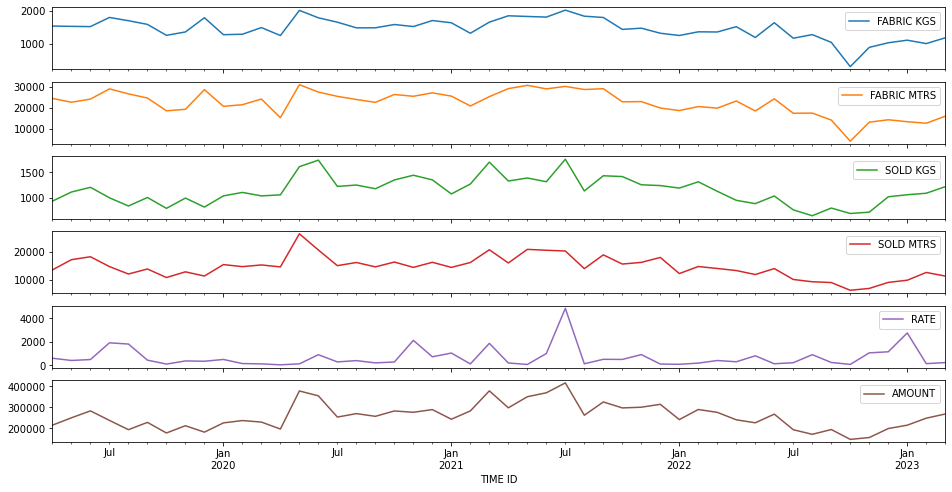

In [12]:
resample_multi_df.plot(subplots=True)

In [13]:
#Augmented Dickey-Fuller Test (ADF Test) to check the stationary of each variable in the dataset
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')
    p_value = round(res[1], 3)

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in resample_multi_df.iteritems():
    adfuller_test(column, name=column.name)

 FABRIC KGS : P-Value = 0.228 => Non-stationary.
 FABRIC MTRS : P-Value = 0.385 => Non-stationary.
 SOLD KGS : P-Value = 0.017 => Stationary. 
 SOLD MTRS : P-Value = 0.25 => Non-stationary.
 RATE : P-Value = 0.0 => Stationary. 
 AMOUNT : P-Value = 0.012 => Stationary. 


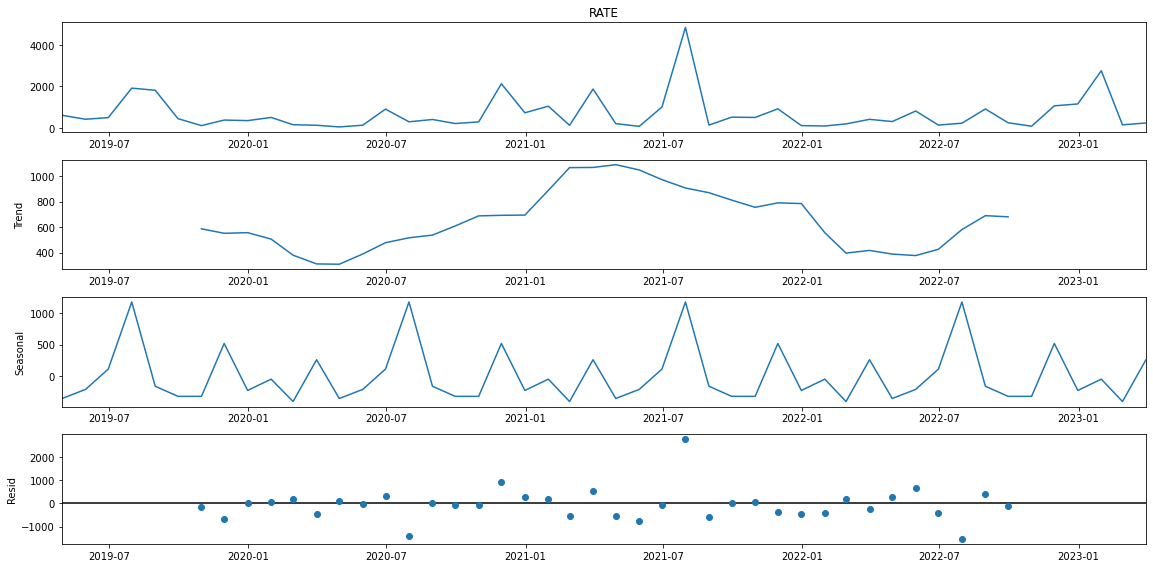

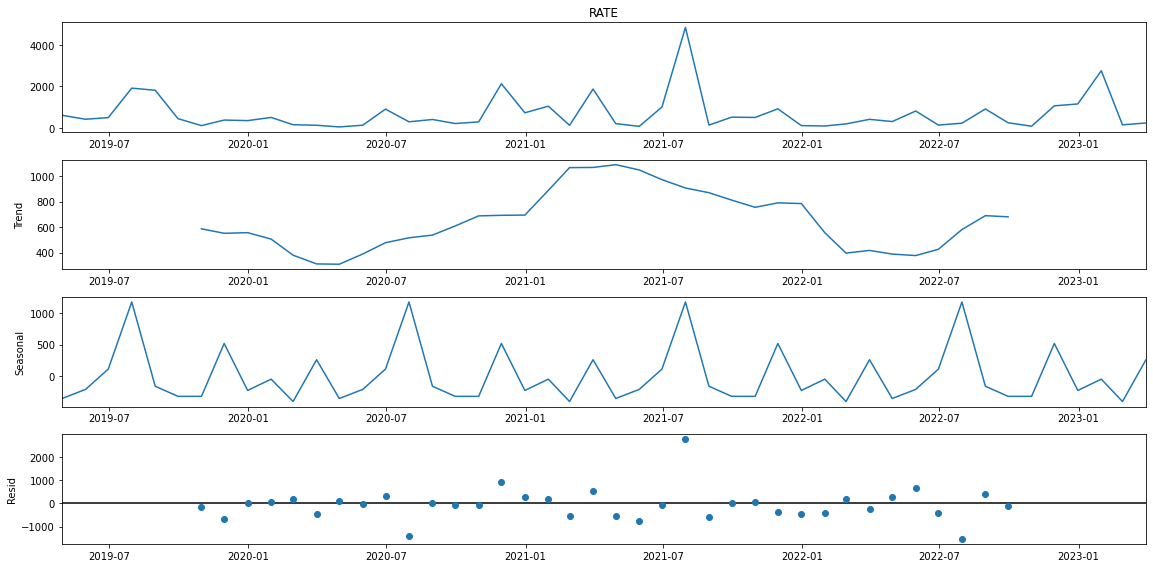

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(resample_multi_df['RATE'])
result.plot()

In [15]:
# from statsmodels.graphics.tsaplots import plot_acf
# plot_acf(resample_multi_df['RATE']);

In [17]:
#!pip install pmdarima

In [16]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [17]:
model = pm.auto_arima(resample_multi_df['RATE'],
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=804.373, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=798.672, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=802.375, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=796.780, Time=0.11 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=798.694, Time=0.27 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=800.301, Time=0.56 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=794.231, Time=0.34 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=796.262, Time=0.23 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=796.264, Time=0.23 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=784.381, Time=0.18 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=783.772, Time=0.81 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept   : AIC=78

In [19]:
train=resample_multi_df[(resample_multi_df.index.get_level_values(0) >= '2019-04-01') & (resample_multi_df.index.get_level_values(0) <= '2022-8-01')]
test=resample_multi_df[(resample_multi_df.index.get_level_values(0) > '2022-8-01')]
test

,FABRIC KGS,FABRIC MTRS,SOLD KGS,SOLD MTRS,RATE,AMOUNT
TIME ID,,,,,,
2022-08-31,1281.209248,17448.218045,654.297008,9357.018797,910.932180,172271.676692
2022-09-30,1046.478333,14163.300000,803.913570,9082.860000,246.667933,194968.933333
2022-10-31,309.766623,4170.162338,697.953614,6322.107143,80.897403,148191.664935
2022-11-30,893.979767,13147.316279,723.473911,6982.971318,1063.739147,156958.290698
2022-12-31,1034.486884,14298.770548,1023.562483,9126.801370,1153.765445,199614.639110
2023-01-31,1112.078777,13374.384892,1063.521396,9905.172662,2756.501223,215584.469424
2023-02-28,1008.993902,12650.569697,1092.666436,12680.428030,146.060530,248827.310606
2023-03-31,1184.262065,15979.301935,1220.552890,11393.487097,236.297839,268725.751774


In [20]:
model.fit(train['RATE'])

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

<AxesSubplot:xlabel='TIME ID'>

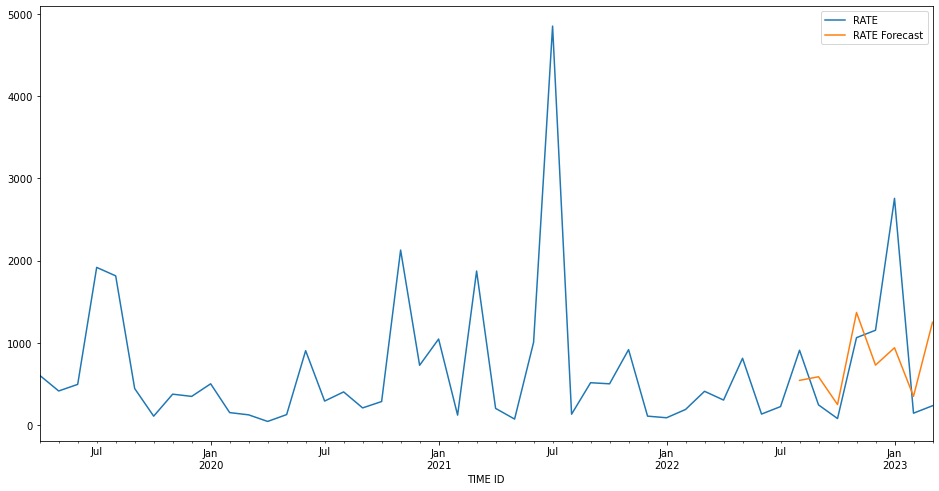

In [23]:
forecast=model.predict(n_periods=9, return_conf_int=True)
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['RATE Forecast'])
pd.concat([resample_multi_df['RATE'],forecast_df],axis=1).plot()

In [27]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

In [29]:
print(pd.DataFrame(dict( rate = test['RATE'].values, rate_predict = forecast_df['RATE Predict'].values)))
print('\n')
print(pd.DataFrame(forecast_accuracy(forecast_df['RATE Predict'].values, test['RATE'].values).items(), columns=['Metrics', 'Value']))

          rate  rate_predict
0   910.932180    544.561876
1   246.667933    588.628862
2    80.897403    251.012219
3  1063.739147   1369.476321
4  1153.765445    730.079541
5  2756.501223    941.044550
6   146.060530    351.453331
7   236.297839   1250.327666


  Metrics       Value
0    mape    1.362768
1      me  -71.034667
2     mae  580.343554
3     mpe    1.005763
4    rmse  784.172663
5    corr    0.368328
6  minmax    0.538169


MSE: 614926.7648254774
RMSE: 784.1726626359002


<AxesSubplot:>

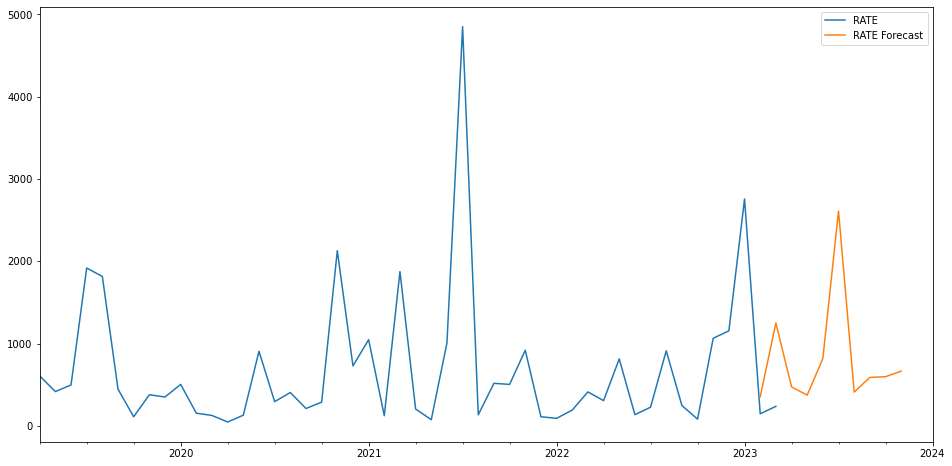

MSE: 739155.695492947
RMSE: 859.7416446194444


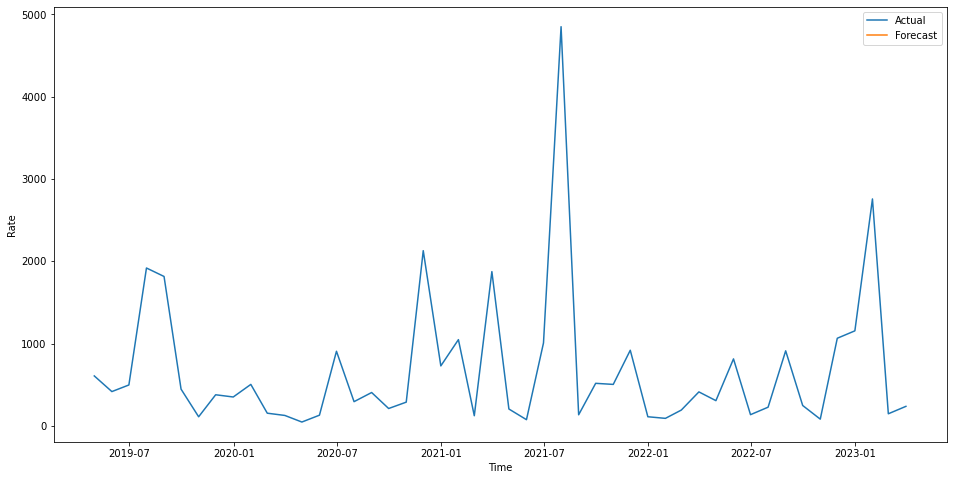